<a href="https://colab.research.google.com/github/Emmahgithub/Analis-de-rendimientos-y-portafolios/blob/main/Renta_fija_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Analisis de renta Fija</i></h1>
  </font>
  <font color="Blue" face="Comic Sans MS,arial">
  <h5 align="center"><i>VARGAS BAUTISTA EMMANUEL</i></h5>
  </font>



#Interpolación lineal.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###############################################################################################################################################################################################

# Funcion encargada de graficar y crear la curva cupon 0
def calcular_y_graficar_curva_cupon_cero(Curva_de_bonos):
    # Inicializar listas para almacenar las Tasas_cupon_cero y los precios sucios
    Tasas_cupon_cero = []
    Precios_sucios = []

    # Iterar sobre cada plazo (fila)
    for i in range(len(Curva_de_bonos)):
        row = Curva_de_bonos.iloc[i]
        #Basicamente aqui vamos a extraer lo datos del dataframe fila por fila
        VN = row['Valor Nominal']
        Tasa = row['Tasa'] / 200  # pasamoooooooos a decimal wuuuuuuuuuu
        Plazo = row['Plazo']
        Tasa_cupon = row['Tasa Cupon'] / 200  # Pasamoooooooos a decimal wuuuuuuuuuu
        Cupon = Tasa_cupon * VN

        # Calculamos el valor presente de los cupones sacar el precio sucio
        periodos = int(Plazo * 2)  # Usando periodos semestrales
        Vp_cupones_m = sum(Cupon / (1 + Tasa) ** ((j + 1) * (Plazo / periodos)) for j in range(periodos - 1)) #traemos a valor precente la suma de los cupones
        Vp_cupones_n = (Cupon + VN) / ((1 + Tasa) ** Plazo) #Traemos a valor precente el ultimo periodo es decir la suma del cupon mas el nominal
        Precio_sucio = Vp_cupones_m + Vp_cupones_n

        # Guardamos el precio sucio
        Precios_sucios.append(Precio_sucio)

        # Calculamos la tasa cupon 0 atraves de la recursividad
        if i == 0:
        # Suponemos que z_1 = ytm es decir suponcion inicial
            z_n = (VN / Precio_sucio) ** (1 / Plazo) - 1
        else:
        # Suma de los cupones descontados con tasas anteriores
            suma_cupones_desc = sum(Cupon / (1 + Tasas_cupon_cero[j]) ** ((j + 1) / 2) for j in range(i))
        # Cálculo de la tasa cupon zero de forma recursiva
            z_n = ((VN + Cupon) / (Precios_sucios[i] - suma_cupones_desc)) ** (1 / ((i + 1) / 2)) - 1

        # Guardamos la tasa cupon cero obtenida previamente
        Tasas_cupon_cero.append(z_n)

    # agregamos la informacion obtenida al dataframe como columnas nuevas
    Curva_de_bonos['Tasa_Cupon_Cero'] = Tasas_cupon_cero
    Curva_de_bonos['Precio_sucio'] = Precios_sucios

    # Vemos los plazos de interpolacion
    plazos_especificos = [1, 3, 4]
    #funcion para interpolar
    tasas_interpoladas = np.interp(plazos_especificos, Curva_de_bonos['Plazo'], Curva_de_bonos['Tasa_Cupon_Cero'])

    # Crear un DataFrame para los plazos interpolados
    df_interpolados = pd.DataFrame({
        'Plazo': plazos_especificos,
        'Tasa_Cupon_Cero': tasas_interpoladas,
        'Precio_sucio': [np.nan] * len(plazos_especificos)  # Asignar NaN a todo lo q no podemos obtener basicamente o no nos interesa
    })

    # Basicamente hacemos un pegado de los dataframe
    Curva_de_bonos = pd.concat([Curva_de_bonos, df_interpolados], ignore_index=True)

    # Ordenar el DataFrame por Plazo antes de graficar pq si no se hace un caos
    Curva_de_bonos = Curva_de_bonos.sort_values(by='Plazo').reset_index(drop=True)

    # Graficar la curva cupón cero (puntos originales con marcadores)
    plt.plot(Curva_de_bonos['Plazo'], Curva_de_bonos['Tasa_Cupon_Cero'] * 100, color='blue', linestyle='-',
             marker='o', label='Curva Original')

    # Graficar los plazos específicos interpolados en otro color
    plt.plot(plazos_especificos, tasas_interpoladas * 100, marker='o', color='red', linestyle='None', label='Plazos Interpolados')

    plt.xlabel("Plazo (Años)")
    plt.ylabel("Tasa Spot (%)")
    plt.title("Curva Cupón Cero")
    plt.grid(True)
    plt.legend()
    plt.show()

    return Curva_de_bonos






###############################################################################################################################################################################################









def agregar_bonos(Bonos):
    while True:
        # Solicitar al usuario los datos del bono
        plazo = float(input("Ingrese el plazo del bono (en años): "))
        tasa = float(input("Ingrese la tasa del bono (en porcentaje): "))
        tasa_cupon = float(input("Ingrese la tasa de cupón (en porcentaje): "))
        valor_nominal = float(input("Ingrese el valor nominal del bono: "))

        nuevo_bono = {
            'Plazo': plazo,
            'Tasa': tasa,
            'Tasa Cupon': tasa_cupon,
            'Valor Nominal': valor_nominal
        }

        # Crear un DataFrame a partir del nuevo bono
        df_nuevo_bono = pd.DataFrame([nuevo_bono])
        # Usar pd.concat para agregar el nuevo bono al DataFrame existente
        Bonos = pd.concat([Bonos, df_nuevo_bono], ignore_index=True)

        # Preguntar al usuario si desea agregar otro bono
        continuar = input("¿Desea agregar otro bono? (si/no): ").strip().lower()
        if continuar != 'si':
            break

    return Bonos






###############################################################################################################################################################################################






def poderoso_a():
    # Curva de bonos de la tarea
    Bonos = pd.DataFrame({
        'Plazo': [0.5, 1.5, 2, 2.5, 3.5, 5],  # Plazos en años
        'Tasa': [10.2, 10.3, 10.35, 10.4, 10.48, 10.5],
        'Tasa Cupon': [0, 8, 8, 8, 8, 8],
        'Valor Nominal': [100, 100, 100, 100, 100, 100]
    })

    while True:
        if not Bonos.empty:  # Si ya hay bonos ingresados
            opcion = input("¿Quieres (A)gregar bonos o (C)alcular la curva cupón cero? (Escribe 'salir' para terminar): ").strip().lower()
            if opcion == 'a':
                Bonos = agregar_bonos(Bonos)
                Bonos = Bonos.sort_values(by='Plazo').reset_index(drop=True)
            elif opcion == 'c':
                print(calcular_y_graficar_curva_cupon_cero(Bonos))
                break
            elif opcion == 'salir':
                print("Saliendo del programa.")
                break
            else:
                print("Opción no válida. Por favor elige 'A' o 'C'.")
        else:  # Si no hay bonos ingresados
            print("No hay bonos ingresados. Agregue bonos primero.")
            Bonos = agregar_bonos(Bonos)
            Bonos = Bonos.sort_values(by='Plazo').reset_index(drop=True)



¿Quieres (A)gregar bonos o (C)alcular la curva cupón cero? (Escribe 'salir' para terminar): C


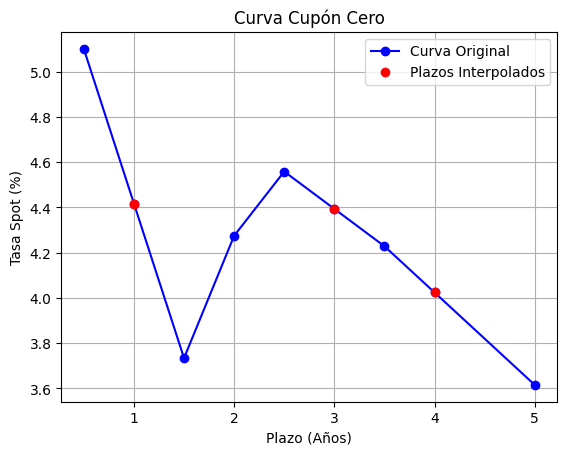

   Plazo   Tasa  Tasa Cupon  Valor Nominal  Tasa_Cupon_Cero  Precio_sucio
0    0.5  10.20         0.0          100.0         0.051000     97.543569
1    1.0    NaN         NaN            NaN         0.044167           NaN
2    1.5  10.30         8.0          100.0         0.037334    104.158722
3    2.0  10.35         8.0          100.0         0.042742    105.429389
4    2.5  10.40         8.0          100.0         0.045581    106.644404
5    3.0    NaN         NaN            NaN         0.043931           NaN
6    3.5  10.48         8.0          100.0         0.042280    108.945064
7    4.0    NaN         NaN            NaN         0.040237           NaN
8    5.0  10.50         8.0          100.0         0.036150    112.269924


In [ ]:
poderoso_a()

#Bootstraping.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funcion encargada de graficar y crear la curva cupon 0
def calcular_y_graficar_curva_cupon_cero(Curva_de_bonos):
    # Inicializar listas para almacenar las Tasas_cupon_cero y los precios sucios
    Tasas_cupon_cero = []
    Precios_sucios = []

    # Iterar sobre cada plazo
    for i in range(len(Curva_de_bonos)):
        row = Curva_de_bonos.iloc[i]
        #Basicamente aqui vamos a extraer lo datos del dataframe fila por fila
        VN = row['Valor Nominal']
        Tipo = row['Tipo']
        Tasa = row['Tasa'] /200 #pasamoooooooos a decimal
        Plazo = row['Plazo']
        Ajuste = row['Ajuste']
        Tasa_cupon = row['Tasa Cupon'] /200 #pasamoooooooos a decimal
        Cupon = (Tasa_cupon) * VN

        # Tipo de cotizacion
        if Ajuste == "A/A":
            Plazo_ajustado = Plazo  # En años basicamente me vale ñonga todo tomo plazos enteros tal cual como se dieron
        elif Ajuste == "30/360":
            Plazo_ajustado = Plazo * (360 / 365)  # Ajuste deacuerdo al calendario es decir años de 360 dias
        else:
            raise ValueError("Que no entiendes que no, ponle 'A/A' o '30/360'")

        # Número de periodos (usando periodos semestrales)

        periodos = int(Plazo_ajustado * 2)

        # Calculamos el valor presente de los cupones sacar el precio sucio que me costo un webo pq no entendia la formula horrible
        Vp_cupones_m = sum(Cupon / (1 + Tasa) ** ((j + 1) * (Plazo_ajustado / periodos)) for j in range(periodos - 1))
        Vp_cupones_n = (Cupon + VN) / ((1 + Tasa) ** Plazo_ajustado)
        Precio_sucio = Vp_cupones_m + Vp_cupones_n

        # Guardamos el precio sucio mugroso
        Precios_sucios.append(Precio_sucio)

        # Calculamos la tasa que se hace llamar z_n con la formula del excel horrible
        if i == 0:
            # Suponemos que z_1 = tasa es decir me vale ñonga todo y digo que en efecto estasa cupon 0
            z_n = (VN / Precio_sucio) ** (1 / 0.5) - 1
        else:
            # Suma de los cupones descontados con tasas anteriores
            suma_cupones_desc = sum(Cupon / (1 + Tasas_cupon_cero[j]) ** ((j + 1) / 2) for j in range(i))

            # Cálculo de la tasa cupon zero horrible que me hizo llorar
            z_n = ((VN + Cupon) / (Precios_sucios[i] - suma_cupones_desc)) ** (1 / ((i + 1) / 2)) - 1

        # Guardamos la mugrosa tasa cupon cero que me hizo llorar
        Tasas_cupon_cero.append(z_n)

    # Agregamos todas las mugrosadas al data frame
    Curva_de_bonos['Tasa_Cupon_Cero'] = Tasas_cupon_cero
    Curva_de_bonos['Precio_sucio'] = Precios_sucios

    # Graficar la curva cupón cero
    plt.plot(Curva_de_bonos['Plazo'], Curva_de_bonos['Tasa_Cupon_Cero'] * 100, marker='o', color='blue', linestyle='-')
    plt.xlabel("Plazo (Años)")
    plt.ylabel("Tasa Spot (%)")
    plt.title("Curva Cupón Cero")
    plt.grid(True)
    plt.show()

    return Curva_de_bonos

###############################################################################################################################################################################################


#funcion para agregar cualquier tipo de bono
def agregar_bonos(Bonos):
    while True:
        # Solicitar al usuario los datos del bono
        plazo = float(input("Ingrese el plazo del bono (en años): "))
        tasa = float(input("Ingrese la tasa del bono (en porcentaje): "))
        tasa_cupon = float(input("Ingrese la tasa de cupón (en porcentaje): "))
        tipo = input("Ingrese el tipo de bono (Curva_de_bonos, BC): ")
        ajuste = input("Ingrese el ajuste (si es aplicable, presione Enter si no): ")
        valor_nominal = float(input("Ingrese el valor nominal del bono: "))

        nuevo_bono = {
            'Plazo': plazo,
            'Tasa': tasa,
            'Tasa Cupon': tasa_cupon,
            'Tipo': tipo,
            'Ajuste': ajuste,
            'Valor Nominal': valor_nominal
        }

        # Crear un DataFrame a partir del nuevo bono
        df_nuevo_bono = pd.DataFrame([nuevo_bono])
        # Usar pd.concat para agregar el nuevo bono al DataFrame existente
        curva = pd.concat([curva, df_nuevo_bono], ignore_index=True)

        # Preguntar al usuario si desea agregar otro bono
        continuar = input("¿Desea agregar otro bono? (si/no): ").strip().lower()
        if continuar != 'si':
            break

    return Bonos



###############################################################################################################################################################################################





def poderoso_b():
    # Curva de bonos de la tarea
    Bonos = pd.DataFrame({
      'Plazo': [0.5, 1.5, 2, 3.5, 5],  # Plazos en años
      'Tasa': [10.2, 10.3, 10.35, 10.4, 10.5],
      'Tasa Cupon': [0, 8, 8, 8, 8],
      'Tipo': ["ZC", "BC", "BC", "BC", "BC"],
      'Ajuste': ["A/A", "A/A", "A/A", "A/A", "A/A"],
      'Valor Nominal': [100, 100, 100, 100, 100]
    })

    while True:
        if not Bonos.empty:  # Si ya hay bonos ingresados
            opcion = input("¿Quieres (A)gregar bonos o (C)alcular la curva cupón cero? (Escribe 'salir' para terminar): ").strip().lower()
            if opcion == 'a':
                Bonos = agregar_bonos(Bonos)
                Bonos = Bonos.sort_values(by='Plazo').reset_index(drop=True)
            elif opcion == 'c':
                print(calcular_y_graficar_curva_cupon_cero(Bonos))
                break
            elif opcion == 'salir':
                print("Saliendo del programa.")
                break
            else:
                print("Opción no válida. Por favor elige 'A' o 'C'.")
        else:  # Si no hay bonos ingresados
            print("No hay bonos ingresados. Agregue bonos primero.")
            Bonos = agregar_bonos(Bonos)
            Bonos = Bonos.sort_values(by='Plazo').reset_index(drop=True)


¿Quieres (A)gregar bonos o (C)alcular la curva cupón cero? (Escribe 'salir' para terminar): C


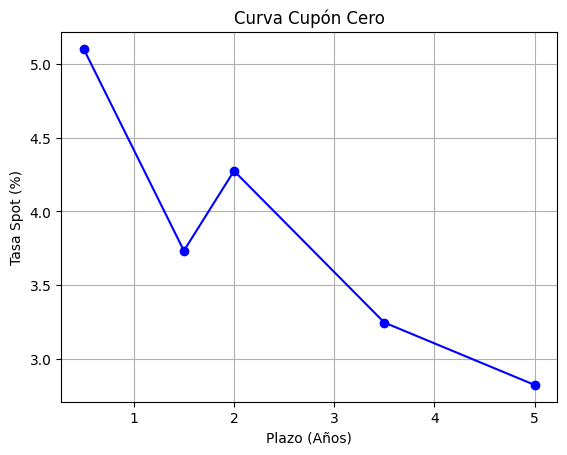

   Plazo   Tasa  Tasa Cupon Tipo Ajuste  Valor Nominal  Tasa_Cupon_Cero  \
0    0.5  10.20           0   ZC    A/A            100         0.051000   
1    1.5  10.30           8   BC    A/A            100         0.037334   
2    2.0  10.35           8   BC    A/A            100         0.042742   
3    3.5  10.40           8   BC    A/A            100         0.032474   
4    5.0  10.50           8   BC    A/A            100         0.028250   

   Precio_sucio  
0     97.543569  
1    104.158722  
2    105.429389  
3    109.075177  
4    112.269924  


In [ ]:
poderoso_b()

#Calculo de Precios

In [ ]:
# Librerias
import numpy as np
import pandas as pd

In [ ]:
def precio_bono(tasa_cupon, dias_vencer, YTM, valor_nominal=100, dias_cupon=182):
    """
    Calcula el precio limpio y sucio, DV01 y duración de un M-Bono (bono con tasa fija).

    Parámetros:
    - tasa_cupon: Tasa anual de cupón (decimales)
    - dias_vencer: Número de días hasta el vencimiento del bono.
    - YTM: Tasa de rendimiento (porcentaje)
    - valor_nominal: Valor nominal (MXN 100).
    - dias_cupon: Cada cuánto paga cupón (182 días)

    Retorna:
    - precio_limpio
    - precio_sucio
    - intereses_devengados
    - duración Macauley
    - duración modificada
    - convexidad
    """

    YTM = YTM / 100  # Convertimos la tasa YTM a decimal

    pago_cupon = valor_nominal * ((tasa_cupon * dias_cupon) / 360) #ajuste de la tasa de interes para que refleje el interes ganado solo durante el periodo del cupon, se divide entre 360 para ajustar la tasa a la convención del año
    periodos = np.ceil(dias_vencer / dias_cupon)  # Ajustamos a periodos basados en días por vencer
    dias_transcurridos = dias_cupon - dias_vencer % dias_cupon
    YTM_s = (YTM * dias_cupon) / 360 #ajuste de la YTM a la convecion Actual/360 es la que se emplea para valuar un bono

    # Precio sucio
    precio_sucio = (pago_cupon + pago_cupon * ((1 / YTM_s) - (1 / (YTM_s * (1 + YTM_s)**(periodos - 1)))) + valor_nominal / (1 + YTM_s)**(periodos - 1)) / (1 + YTM_s)**(1 - dias_transcurridos / dias_cupon)

    # Intereses devengados
    intereses_devengados = valor_nominal * ((dias_transcurridos * tasa_cupon) / 360)

    # Precio limpio
    precio_limpio = precio_sucio - intereses_devengados

    # Duración de Macauley y Convexidad
    duracion = 0
    convexidad = 0
    for i in range(1, int(periodos) + 1):
        ti = i - (dias_transcurridos / dias_cupon) # definimos ti
        DFi = (1 / (1 + YTM_s)) ** ti # factor de descuento
        if i < periodos:
            CFi = pago_cupon
        else:
            CFi = pago_cupon + valor_nominal  # Último cupon + valor nominal
        duracion += (ti * CFi * DFi) / precio_sucio
        convexidad += (CFi * DFi * (ti**2 + ti)) / precio_sucio

     # Duración de Macauley (anual)
    duracion_mac = duracion * (dias_cupon / 360)

    # Duración modificada (anual)
    duracion_mod = duracion_mac /(1 + YTM_s)

    # Convexidad
    convexidad = convexidad * (1 / (1 + YTM_s)**2) * (dias_cupon / 360)**2

    return precio_sucio, precio_limpio, intereses_devengados, duracion_mac, duracion_mod, convexidad


#MBonos

In [ ]:
df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vSytMRGtX_I-Qtz7eyAXC3S7qeJQh6QAyVcgpv7sbWrU5NubFLFmmyoufO_a7KngA/pub?output=xlsx', sheet_name='MBONOS')

bonoM = df[['Instrumento', 'TasaCuponVigente', 'Rendimiento', 'DiasPorVencer']] # nuevo data.frame solo con esas columnas

resultados = [] # almacenar datos de cada bono

for _, row in bonoM.iterrows(): # iterar sobre cada fila del data.frame bonoM
    tasa_cupon = row['TasaCuponVigente'] # el dato de la columna "TasaCuponVigente" de la fila actual asignarla a "tasa_cupon"
    dias_vencer = row['DiasPorVencer']
    YTM = row['Rendimiento']

    # llamar a la funcion precio_bono
    precio_sucio, precio_limpio, intereses_devengados, duracion_mac, duracion_mod, convexidad = precio_bono(
        tasa_cupon=tasa_cupon,
        dias_vencer=dias_vencer,
        YTM = YTM
    )

    # Agregar un diccionario (columa "Instrumento") a la lista resultados
    resultados.append({
        'Instrumento': row['Instrumento'],
        'Precio Sucio MXN': precio_sucio,
        'Precio Limpio MXN': precio_limpio,
        'Intereses Devengados MXN': intereses_devengados,
        'Duración Macauley (años)': duracion_mac,
        'Duración Modificada (años)': duracion_mod,
        'Convexidad': convexidad
    })

resultados_bonoM = pd.DataFrame(resultados) #crear un nuevo data frame (organizar datos en un tabla)
resultados_bonoM

,Instrumento,Precio Sucio MXN,Precio Limpio MXN,Intereses Devengados MXN,Duración Macauley (años),Duración Modificada (años),Convexidad
0,M_BONOS_260903,95.595687,94.623465,0.972222,1.778559,1.691342,3.776939
1,M_BONOS_290301,95.880173,94.699618,1.180556,3.706462,3.527928,15.583146
2,M_BONOS_341123,88.305484,85.270068,3.035417,6.731624,6.404906,56.619823
3,M_BONOS_471107,82.342256,79.208923,3.133333,9.212130,8.752812,132.945024


#Udibonos

In [ ]:
df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vSytMRGtX_I-Qtz7eyAXC3S7qeJQh6QAyVcgpv7sbWrU5NubFLFmmyoufO_a7KngA/pub?output=xlsx', sheet_name='UDIBONOS')

Udi = 8.250745 #precio de la Udi el 25/10/2024 (fecha de valuación)

udibono = df[['Instrumento', 'TasaCuponVigente', 'Rendimiento', 'DiasPorVencer']] # nuevo data.frame solo con esas columnas

resultados = [] #almacenar datos de cada bono

for _, row in udibono.iterrows(): # iterar sobre cada fila del data.frame udibono
    tasa_cupon = row['TasaCuponVigente']
    dias_vencer = row['DiasPorVencer']
    YTM = row['Rendimiento']

    # llamar a la funcion precio_bono
    precio_sucio, precio_limpio, intereses_devengados, duracion_mac, duracion_mod, convexidad = precio_bono(
        tasa_cupon=tasa_cupon,
        dias_vencer=dias_vencer,
        YTM = YTM
    )

    # precios e intereses considerando la UDI
    precio_sucio_udi = precio_sucio * Udi
    precio_limpio_udi = precio_limpio * Udi
    intereses_devengados_udi = intereses_devengados * Udi

    # Agregar un diccionario (columa "Instrumento") a la lista resultados
    resultados.append({
        'Instrumento': row['Instrumento'],
        'Precio Sucio MXN': precio_sucio_udi,
        'Precio Limpio MXN': precio_limpio_udi,
        'Intereses Devengados MXN': intereses_devengados_udi,
        'Duración Macauley (años)': duracion_mac,
        'Duración Modificada (años)': duracion_mod,
        'Convexidad': convexidad
    })

resultados_udibono = pd.DataFrame(resultados) #creamos un nuevo data.frame
resultados_udibono

,Instrumento,Precio Sucio MXN,Precio Limpio MXN,Intereses Devengados MXN,Duración Macauley (años),Duración Modificada (años),Convexidad
0,S_UDIBONO_261203,785.489214,775.794588,9.694625,2.058441,1.997644,5.077034
1,S_UDIBONO_340824,742.040557,737.456809,4.583747,8.156246,7.939889,75.607846
2,S_UDIBONO_501103,697.697659,684.771492,12.926167,15.214246,14.825256,315.411921
3,S_UDIBONO_541029,689.630836,676.704669,12.926167,16.194464,15.781190,371.779545


#Cetes


In [ ]:
def cetes(dias_vencer, tasa, es_descuento, valor_nominal=10):
    """
    Calcula el precio de CETES (bono cupón cero), así como su duración de Macaulay,
    duración modificada y convexidad.

    Parámetros:
    - dias_vencer: Número de días por vencer del bono.
    - tasa: Tasa (en porcentaje)
    - es_descuento: Booleano para saber si es tasa de descuento o rendimiento.
    - valor_nominal: Valor nominal del CETES (usualmente MXN 10).

    Retorna:
    - precio: El valor presente del CETES (en MXN).
    - duracion_macaulay: Duración de Macaulay en años.
    - duracion_modificada: Duración modificada en años.
    - convexidad: Convexidad del CETE.
    """

    aux = tasa.copy() #Copia de la lista tasa

    for i in range(len(tasa)):
      tasa[i] = tasa[i] / 100  # Convertimos las tasas de porcentaje a decimal

    # Los CETES son bonos cupón cero, así que simplemente descontamos el valor nominal en días

    precio = [0]*len(tasa) #Lista de la misma longitud de las tasas
    for i in range(len(tasa)):
      if es_descuento:
          precio[i] = valor_nominal * (1 - (tasa[i] * dias_vencer[i]) / 360)
      else:
          precio[i] = valor_nominal / (1 + tasa[i] * dias_vencer[i] / 360)

    # Duración Macaulay (en años, considerando que el CETE es cupón cero)
    duracion_macaulay = [0]*len(tasa)  #Lista de la misma longitud de las tasas

    for i in range(len(tasa)):
      duracion_macaulay[i] = dias_vencer[i]/360

    # Duración Modificada
    duracion_modificada = [0]*len(tasa) #Lista de la misma longitud de las tasas
    interes = [0]*len(tasa)  #Lista de la misma longitud de las tasas
    for i in range(len(tasa)):
      interes[i] = tasa[i]/(1-tasa[i]*(dias_vencer[i]/360))

    for i in range(len(tasa)):
      if es_descuento:
        duracion_modificada[i] = duracion_macaulay[i] / (1 + interes[i] * (dias_vencer[i] / 360) )
      else:
        duracion_modificada[i] = duracion_macaulay[i] / (1 + tasa[i] * (dias_vencer[i] / 360) )

    # Convexidad
    convexidad = [0]*len(tasa)
    for i in range(len(tasa)):
      if es_descuento:
        convexidad[i] = 2 * ((dias_vencer[i]/360)**2) * ((1+ interes[i] * (dias_vencer[i] / 360) )**(-2))
      else:
        convexidad = 2 * ((dias_vencer[i]/360)**2) * ((1+ tasa[i] * (dias_vencer[i] / 360) )**(-2))

    # Definir la lista de instrumentos
    instrumento = ["BI_CETES_250123", "BI_CETES_251016", "BI_CETES_260219", "BI_CETES_260611", "BI_CETES_261001", "BI_CETES_270403"] # Asegúrate de que la longitud de esta lista coincida con la longitud de dias_vencer y tasa

    df = pd.DataFrame({"Instrumento": instrumento, "Dias Vencimiento": dias_vencer, "Tasa %": aux,"Precio MXN": precio, "Duracion Macaulay (años) ": duracion_macaulay,  "Duracion Modificada (años)": duracion_modificada, "Convexidad": convexidad})

    return (df)

dias = [90, 104, 356, 482, 594, 706]
tasas = [10.231425, 10.209715, 9.594304, 9.290262, 9.036529, 8.803121]

cetes(dias, tasas, 1)


,Instrumento,Dias Vencimiento,Tasa %,Precio MXN,Duracion Macaulay (años),Duracion Modificada (años),Convexidad
0,BI_CETES_250123,90,10.231425,9.744214,0.250000,0.243605,0.118687
1,BI_CETES_251016,104,10.209715,9.705053,0.288889,0.280368,0.157213
2,BI_CETES_260219,356,9.594304,9.051230,0.988889,0.895066,1.602287
3,BI_CETES_260611,482,9.290262,8.756137,1.338889,1.172349,2.748807
4,BI_CETES_261001,594,9.036529,8.508973,1.650000,1.403980,3.942322
5,BI_CETES_270403,706,8.803121,8.273610,1.961111,1.622547,5.265317
